In [1]:
import numpy as np
import seaborn as sns
from scipy.stats import poisson
import matplotlib.pyplot as plt

def makeMatrix(N, alpha, beta):
    retMatrix = []
    for n in range(N):
        # decide new dishes for the n th customer
        hs = poisson.rvs(alpha * beta / (n + beta))
        
#        print (n, " : ", hs)
        # for each column
        for h in range(hs):
            vec = []
            # intialize N_h
            N_h = 1

            for z in range(n):
                vec.append(0)
            
            # new dish for n th customer
            vec.append(1)
                
            for z in range(n + 1, N):
                # process 2
                # z = n - 1
                if np.random.rand() < (N_h / (z + beta)):
                    vec.append(1)
                    # update N_h
                    N_h += 1
                else:
                    vec.append(0)

            retMatrix.append(vec)

    return np.array(retMatrix).T



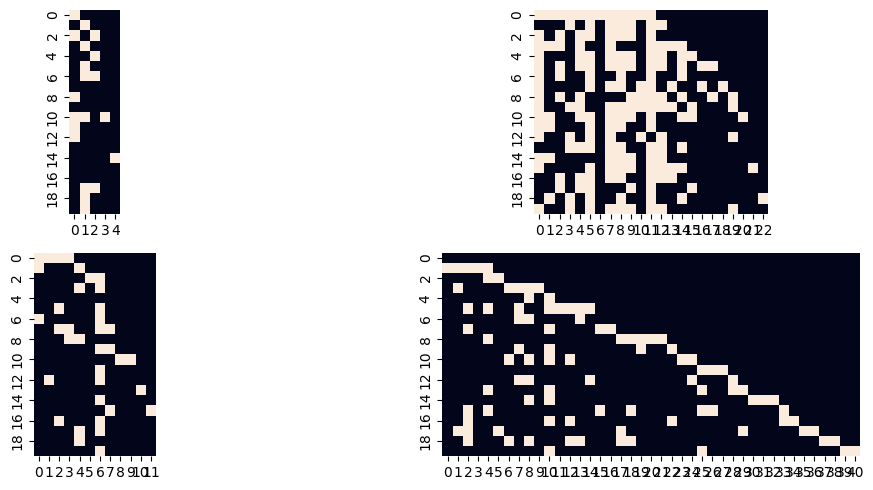

In [2]:
N = 20
ROWS = 2
COLUMNS = 2

alphas = [1.0, 5.0, 1.0, 5.0]
betas = [1.0, 1.0, 5.0, 5.0]

fig, axesTmp = plt.subplots(ROWS, COLUMNS, tight_layout = True, figsize = (20, 5))

axes = axesTmp.ravel()

for alpha, beta, ax in zip(alphas, betas, axes):
    M = makeMatrix(N, alpha, beta)
#   print(M)

    sns.heatmap(M, cbar = False, ax = ax)

    ax.set_aspect(1)

plt.show()